# Project WeRateDogs: Wrangle and Analyze data for 

Our goal is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations.

In [1]:
# Import packages
import pandas as pd
import numpy as np
import requests

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

import os
import time
import re

import warnings
warnings.filterwarnings('ignore')

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        }

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
sns.set_context(font_scale=1.0, rc={"lines.linewidth": 1.0})
plt.style.use('fivethirtyeight')

%matplotlib inline

# 1. Gathering Data for Project

### In this project we need to gather data from 3 resources

1. The WeRateDogs Twitter archive. twitter_archive_enhanced.csv

2. The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

3. Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet-json.txt file. 

## Load WeRateDogs Twitter archive

In [2]:
# downloaded from the project details page
df = pd.read_csv("twitter-archive-enhanced.csv")
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## Programmatically Download Data

In [3]:
# Import Data Programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Save Data
with open('image-predictions.tsv', "wb") as file: file.write(response.content)

In [4]:
# downloaded from the project details page
df_image = pd.read_table('image-predictions.tsv', sep='\t')
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Accessing Project Data Without a Twitter Account

In [5]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [7]:
# downloaded from the project details page 
with open('tweet-json.txt') as file:
    tweets_data = []
    for line in file:
        tweets_data.append(json.loads(line))

In [8]:
df_tweet = pd.DataFrame(tweets_data, columns=list(tweets_data[0].keys()))
df_tweet.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8853,39467,False,False,False,False,en
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,6514,33819,False,False,False,False,en
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,4328,25461,False,False,False,False,en
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8964,42908,False,False,False,False,en
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,9774,41048,False,False,False,False,en


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 27 columns):
created_at                       2354 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
full_text                        2354 non-null object
truncated                        2354 non-null bool
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
source                           2354 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null object
in_reply_to_screen_name          78 non-null object
user                             2354 non-null object
geo                              0 non-null object
coordinates                      0 non-null

# 2. Assessing Data for Project

## Visual assessment  for quality and tidiness issues

During the data gathering stage in order to get a feel for the data quality and tidiness, the csv files for each dataset were downloaded and opened in Excel. From excel we can quickly identified: 

> 8 quality issues can be identified based on completeness, validity, accuracy, & consistency. 

> 2 tidiness issues which are with structure that prevent easy analysis.


### Quality issues

1.  df, df_image are different probably due to retweets and missing photos.

__In "twitter-archive-enhanced.csv"__
2. __name__ of the dog is "None", or incorrect such as "a", "an", & "by"
3. entries were missing or Null in __expanded_urls__ .
4. check if all four dog stages are None
5. 181 retweets and 78 replies which not needed
6. rating_denominator is not always 10 and rating_numerator is extremly high at some places
7. not all the data are in their most appropriate data type (tweet_id should be string, rating_denominator & rating_numerator should be float)
8. consistent names and logical order to column data as final step in cleaning


### Tidiness

1. Four dog stages columns in twitter-archived dataframe can be combined in one single column.
2. From three prediction columns in image-tweet dataframe, extract the best dog breed prediction including confidence value.
3. Select only columns important for the analysis from tweet-json dataframe.



## Programmatically assessment for quality and tidiness issues

### Quality issue 1 (different shapes)

In [12]:
print("df: ", len(df), " df_image: ", len(df_image), " df_tweet:", len(df_tweet))

df:  2356  df_image:  2075  df_tweet: 2354


### Quality issue 2 (name of the dog is "None")

In [13]:
name_in_df = df["name"]
name_in_df.value_counts()

None            745
a                55
Charlie          12
Lucy             11
Oliver           11
Cooper           11
Tucker           10
Lola             10
Penny            10
Bo                9
Winston           9
the               8
Sadie             8
Daisy             7
Buddy             7
an                7
Bailey            7
Toby              7
Jax               6
Leo               6
Stanley           6
Bella             6
Rusty             6
Koda              6
Jack              6
Dave              6
Oscar             6
Scout             6
Milo              6
Oakley            5
               ... 
Daniel            1
Strider           1
Robin             1
Kramer            1
Ronduh            1
Cleopatricia      1
Brockly           1
Barney            1
Lili              1
Rudy              1
Jiminus           1
Wishes            1
Aqua              1
Creg              1
Timmy             1
Furzey            1
Jed               1
Tupawc            1
Yukon             1


### Quality issue 3 (entries were missing or Null in expanded_urls)

In [14]:
expanded_urls_in_df = df["expanded_urls"]
expanded_urls_in_df.isnull().value_counts()

False    2297
True       59
Name: expanded_urls, dtype: int64

### Quality issue 4 (check if all four dog stages are Nones)

In [15]:
df.query(" doggo=='None' and floofer=='None' and pupper=='None' and puppo=='None' ").count()["tweet_id"]

1976

### Quality 5 (181 retweets and 78 replies)

In [16]:
# retweets
retweeted_status_id_df = df["retweeted_status_id"]
retweeted_status_id_df.isnull().value_counts()

True     2175
False     181
Name: retweeted_status_id, dtype: int64

In [17]:
# replies
in_reply_to_status_id_df = df["in_reply_to_status_id"]
in_reply_to_status_id_df.isnull().value_counts()

True     2278
False      78
Name: in_reply_to_status_id, dtype: int64

### Quality 6 (rating_denominator is not always 10 rating_numerator is extremly high at some places)

In [18]:
# rating_denominator
df.query(" rating_denominator != 10").count()["rating_denominator"]

23

In [19]:
# rating_numerator
rating_numerator_df = df.query(" rating_numerator > 13")["rating_numerator"]
rating_numerator_df.value_counts()

14      54
15       2
75       2
420      2
45       1
144      1
17       1
20       1
24       1
666      1
27       1
165      1
44       1
121      1
143      1
182      1
60       1
960      1
204      1
80       1
84       1
88       1
99       1
26       1
1776     1
50       1
Name: rating_numerator, dtype: int64

### Quality 7 (not all the data are in their most appropriate data type)

In [20]:
df.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

### Quality 8 (consistent names and logical order to column data as final step in cleaning)

In [21]:
df_tweet.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang'],
      dtype='object')

In [22]:
pd.DataFrame(df_tweet, columns = ['id', 'favorite_count', 'retweet_count']).head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


### Tidiness issues

In [23]:
# Four dog stages columns in twitter-archived dataframe can be combined in one single column.

pd.DataFrame(df, columns = ['doggo','floofer','pupper','puppo']).sample(10)

,doggo,floofer,pupper,puppo
593,None,None,None,None
1327,None,None,pupper,None
1122,None,None,pupper,None
1997,None,None,None,None
2006,None,None,None,None
912,None,None,None,None
742,None,None,None,None
1225,None,None,None,None
2179,None,None,None,None
1779,None,None,None,None


In [24]:
# From three prediction columns in image-tweet dataframe, extract the best dog breed prediction including confidence value.

pd.DataFrame(df_image, columns = ['p1', 'p1_conf','p2', 'p2_conf','p3', 'p3_conf']).sample(5)

,p1,p1_conf,p2,p2_conf,p3,p3_conf
325,ski_mask,0.968325,mask,0.021863,abaya,0.005479
1772,German_shepherd,0.806115,Tibetan_mastiff,0.104831,kelpie,0.038148
1451,Labrador_retriever,0.884839,Chesapeake_Bay_retriever,0.057565,paintbrush,0.005766
1674,beagle,0.848735,Ibizan_hound,0.044603,Italian_greyhound,0.018611
1156,chow,0.931275,beaver,0.028831,dhole,0.017379


In [25]:
# Select only columns important for the analysis from tweet-json dataframe.

pd.DataFrame(df_tweet, columns = ['id', 'favorite_count', 'retweet_count']).head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


# 3. Cleaning Data for this Project


### Copy the dataframes for data cleaning process

In [26]:
dup_df = df.copy()
dup_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [27]:
dup_df_image =  df_image.copy()
dup_df_image.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

### Save the required columns from df_tweet

In [28]:
dup_df_tweet =  pd.DataFrame(df_tweet, columns = ['id', 'favorite_count', 'retweet_count'])
dup_df_tweet.columns

Index(['id', 'favorite_count', 'retweet_count'], dtype='object')

## A. Combine dog stages in one single column

In [29]:
# fetch the dog stage details 
_dog_stages = []
for i in range(len(dup_df)):
    stage = dup_df.iloc[i,13:]
    if ("None" in stage[0]) and ("None" in stage[1]) and ("None" in stage[2]) and ("None" in stage[3]):
        _dog_stages.append("None")
    elif ("doggo" in stage[0]):
        _dog_stages.append("doggo")
    elif ("floofer" in stage[1]):
        _dog_stages.append("floofer")
    elif ("pupper" in stage[2]):
        _dog_stages.append("pupper")        
    elif ("puppo" in stage[3]):
        _dog_stages.append("puppo") 


In [30]:
# Add dog_stage column 
dup_df["dog_stage"] = _dog_stages

In [31]:
# check the columns 
dup_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'dog_stage'],
      dtype='object')

In [32]:
# check shape before
dup_df.shape

(2356, 18)

In [33]:
# remove old columns
dup_df.drop(['doggo', 'floofer', "pupper", "puppo"],  axis=1, inplace=True)

In [34]:
# check shape after
dup_df.shape

(2356, 14)

In [35]:
# check the columns after operation
dup_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

In [36]:
# check counts
dup_df["dog_stage"].value_counts()

None       1976
pupper      245
doggo        97
puppo        29
floofer       9
Name: dog_stage, dtype: int64

In [37]:
dup_df.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
730,781661882474196992,NaN,NaN,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Who keeps sending in pictures without dogs in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781661882...,5,10,None,None
432,820749716845686786,NaN,NaN,2017-01-15 21:49:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sunny. He can take down a polar bear in o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820749716...,13,10,Sunny,None
1725,680070545539371008,NaN,NaN,2015-12-24 17:00:27 +0000,"<a href=""https://about.twitter.com/products/tw...",Say hello to Emmie. She's trapped in an orname...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680070545...,9,10,Emmie,None


### Special Case where dog belongs to more than one stages

In [38]:
# dog belongs to more than one stages
df_mul_dog_stages = df.copy()
doggo_floofer = df_mul_dog_stages.query("doggo=='doggo' and floofer=='floofer'").count()["tweet_id"]
doggo_pupper = df_mul_dog_stages.query("doggo=='doggo' and pupper=='pupper'").count()["tweet_id"]
doggo_puppo = df_mul_dog_stages.query("doggo=='doggo' and puppo=='puppo'").count()["tweet_id"]

floofer_pupper = df_mul_dog_stages.query("floofer=='floofer' and pupper=='pupper'").count()["tweet_id"]
floofer_puppo = df_mul_dog_stages.query("floofer=='floofer' and puppo=='puppo'").count()["tweet_id"]

pupper_puppo = df_mul_dog_stages.query("pupper=='pupper' and puppo=='puppo'").count()["tweet_id"]

print("doggo_floofer ", doggo_floofer, " doggo_pupper ", doggo_pupper, 
      " doggo_puppo ", doggo_puppo, " floofer_pupper ", floofer_pupper, 
      " floofer_puppo ", floofer_puppo, " pupper_puppo ", pupper_puppo )

doggo_floofer  1  doggo_pupper  12  doggo_puppo  1  floofer_pupper  0  floofer_puppo  0  pupper_puppo  0


> Since, there are only 14 cases where dog belongs to more than one stage. I have decided to not consider such case in this analysis further.

## B. Select only columns important for the analysis from dataframes


### Join data frames 

In [39]:
# merge dup_df with dup_df_tweet
df_merge_tmp = dup_df.join(dup_df_tweet.set_index('id'), on="tweet_id")

In [40]:
df_merge_tmp.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,39467.0,8853.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,33819.0,6514.0


In [41]:
# merge df_merge_tmp with dup_df_image
df_complete = df_merge_tmp.join(dup_df_image.set_index('tweet_id'), on="tweet_id")

In [42]:
# set output width to visualize all columns
pd.set_option("display.max_columns",df_complete.shape[1]+1)
df_complete.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,39467.0,8853.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,33819.0,6514.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,25461.0,4328.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


In [43]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     2356 non-null object
favorite_count                2354 non-null float64
retweet_count                 2354 non-null float64
jpg_url                       2075 non-null object
img_num                       

### Remove retweets and replies

In [44]:
df_complete = df_complete[df_complete.retweeted_status_id.isnull()]

In [45]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
dog_stage                     2175 non-null object
favorite_count                2175 non-null float64
retweet_count                 2175 non-null float64
jpg_url                       1994 non-null object
img_num                       1994 n

In [46]:
df_complete.drop(
    ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], 
    axis=1, inplace=True)

In [47]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
dog_stage                2175 non-null object
favorite_count           2175 non-null float64
retweet_count            2175 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf             

In [48]:
df_complete = df_complete[df_complete.in_reply_to_status_id.isnull()]

In [49]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 2097 non-null int64
in_reply_to_status_id    0 non-null float64
in_reply_to_user_id      0 non-null float64
timestamp                2097 non-null object
source                   2097 non-null object
text                     2097 non-null object
expanded_urls            2094 non-null object
rating_numerator         2097 non-null int64
rating_denominator       2097 non-null int64
name                     2097 non-null object
dog_stage                2097 non-null object
favorite_count           2097 non-null float64
retweet_count            2097 non-null float64
jpg_url                  1971 non-null object
img_num                  1971 non-null float64
p1                       1971 non-null object
p1_conf                  1971 non-null float64
p1_dog                   1971 non-null object
p2                       1971 non-null object
p2_conf               

In [50]:
df_complete.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

In [51]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stage             2097 non-null object
favorite_count        2097 non-null float64
retweet_count         2097 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-

### Remove tweet that don't have image urls

In [52]:
df_complete = df_complete[df_complete.jpg_url.notnull()]

In [53]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
dog_stage             1971 non-null object
favorite_count        1971 non-null float64
retweet_count         1971 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-

### Clean source column

In [54]:
df_complete["source"] = df_complete["source"].apply(lambda y: re.findall(r'>(.*)<', y)[0])
df_complete["source"].value_counts()

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

### Change timestamp datatype

In [55]:
# remove +0000 from str and change the datatype for proper timestamp
df_complete.timestamp = df_complete.timestamp.str.strip('+0000')
df_complete.timestamp = pd.to_datetime(df_complete.timestamp)
df_complete.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,39467.0,8853.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,33819.0,6514.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,25461.0,4328.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,42908.0,8964.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,41048.0,9774.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


## C. Extract the best dog breed prediction & confidence value.

In [56]:
# check where prediction is False in all top-3 predictions
idx = df_complete[(df_complete["p1_dog"] == False) & \
                  (df_complete["p2_dog"] == False) & \
                  (df_complete["p3_dog"] == False)]["tweet_id"].index
print("Total places where predictions is FALSE: ", idx.shape[0])

# Drop those indexes
df_complete.drop(idx, inplace=True)
df_complete.info()

Total places where predictions is FALSE:  305
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2355
Data columns (total 22 columns):
tweet_id              1666 non-null int64
timestamp             1666 non-null datetime64[ns]
source                1666 non-null object
text                  1666 non-null object
expanded_urls         1666 non-null object
rating_numerator      1666 non-null int64
rating_denominator    1666 non-null int64
name                  1666 non-null object
dog_stage             1666 non-null object
favorite_count        1666 non-null float64
retweet_count         1666 non-null float64
jpg_url               1666 non-null object
img_num               1666 non-null float64
p1                    1666 non-null object
p1_conf               1666 non-null float64
p1_dog                1666 non-null object
p2                    1666 non-null object
p2_conf               1666 non-null float64
p2_dog                1666 non-null object
p3                  

In [57]:
dog_breed = []
confidence = []

# function iterates through prediction columns to find the best prediction 
def dog_breed_confidence(row):
    """ Finds the best prediction score for dog breed
    
    Args:
        row: dataframe
    Returns:
        updated list for breed with high confidence
    """
    
    if row['p1_dog'] == True:
        dog_breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        dog_breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        dog_breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        dog_breed.append('Unknown')
        confidence.append(0)
        
# call function using pandas apply by columns
df_complete.apply(dog_breed_confidence, axis=1)

# add to main dataframe
df_complete['dog_breed'] = dog_breed
df_complete['confidence'] = confidence

# check the new dataframe 
df_complete.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed,confidence
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,33819.0,6514.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,25461.0,4328.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,42908.0,8964.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,41048.0,9774.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,basset,0.555712
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,20562.0,3261.0,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,Chesapeake_Bay_retriever,0.425595


In [58]:
# drop old predictions
df_complete.drop(['img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],
                 axis=1, inplace=True)
df_complete.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,dog_breed,confidence
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,33819.0,6514.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,25461.0,4328.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,42908.0,8964.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,41048.0,9774.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,20562.0,3261.0,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595


## D. Clean remaining datatypes 

In [59]:
# convert rating_numerator and rating_denominator column datatype to float
_df_rating = df_complete.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
_df_rating.columns = ['rating_numerator', 'rating_denominator']
df_complete['rating_numerator'] = _df_rating['rating_numerator'].astype(float)
df_complete['rating_denominator'] = _df_rating['rating_denominator'].astype(float)

In [60]:
# Tweet_id column to pandas string/object type
df_complete["tweet_id"] = df_complete["tweet_id"].apply(str)
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2355
Data columns (total 14 columns):
tweet_id              1666 non-null object
timestamp             1666 non-null datetime64[ns]
source                1666 non-null object
text                  1666 non-null object
expanded_urls         1666 non-null object
rating_numerator      1666 non-null float64
rating_denominator    1666 non-null float64
name                  1666 non-null object
dog_stage             1666 non-null object
favorite_count        1666 non-null float64
retweet_count         1666 non-null float64
jpg_url               1666 non-null object
dog_breed             1666 non-null object
confidence            1666 non-null float64
dtypes: datetime64[ns](1), float64(5), object(8)
memory usage: 195.2+ KB


# 4. Storing, Analyzing, and Visualizing Data for this Project

## Store final dataframe after cleaning

In [61]:
# store the df_complete dataframe
df_complete.to_csv("twitter_archive_master.csv", encoding="utf-8", index=False)

In [62]:
# load and confirm the store process

master_df = pd.read_csv("twitter_archive_master.csv")
master_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,dog_breed,confidence
0,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,33819.0,6514.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
1,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,25461.0,4328.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
2,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,42908.0,8964.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086
3,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,41048.0,9774.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712
4,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,None,20562.0,3261.0,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595


## Analysis and visualizations

### Dataset statistics

In [63]:
master_df.describe()

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count,confidence
count,1.666000e+03,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000
mean,7.395044e+17,11.336002,10.468788,9288.184274,2834.429772,0.551571
std,6.801710e+16,7.304689,6.343940,12641.538890,4831.960790,0.298923
min,6.660209e+17,0.000000,2.000000,81.000000,16.000000,0.000010
25%,6.775503e+17,10.000000,10.000000,2176.000000,650.500000,0.305955
50%,7.141778e+17,11.000000,10.000000,4464.000000,1440.500000,0.550914
75%,7.931921e+17,12.000000,10.000000,11734.750000,3261.000000,0.822939
max,8.921774e+17,165.000000,150.000000,132810.000000,79515.000000,0.999956


### Favorite  dog breed

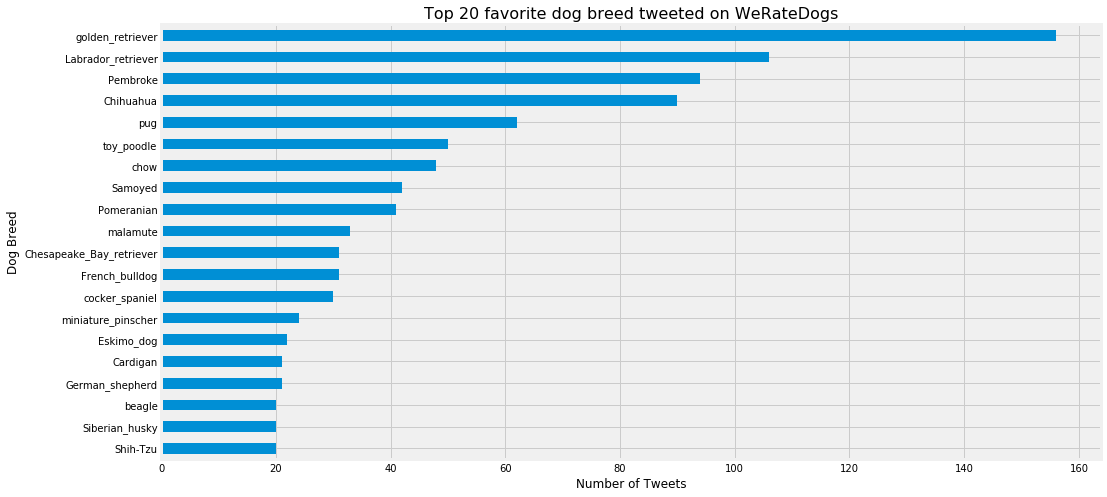

In [64]:
# favorite dog breed among twitter users (Top 20 dog breeds)
fav_dogs = master_df["dog_breed"].value_counts().nlargest(20)

# Plot to show top 20 dog breeds
fig = plt.figure(figsize=(15,8))
fav_dogs.sort_values(ascending=True).plot(kind='barh')
plt.title("Top 20 favorite dog breed tweeted on WeRateDogs",fontsize=16)
plt.ylabel("Dog Breed")
plt.xlabel("Number of Tweets");

### Ratings

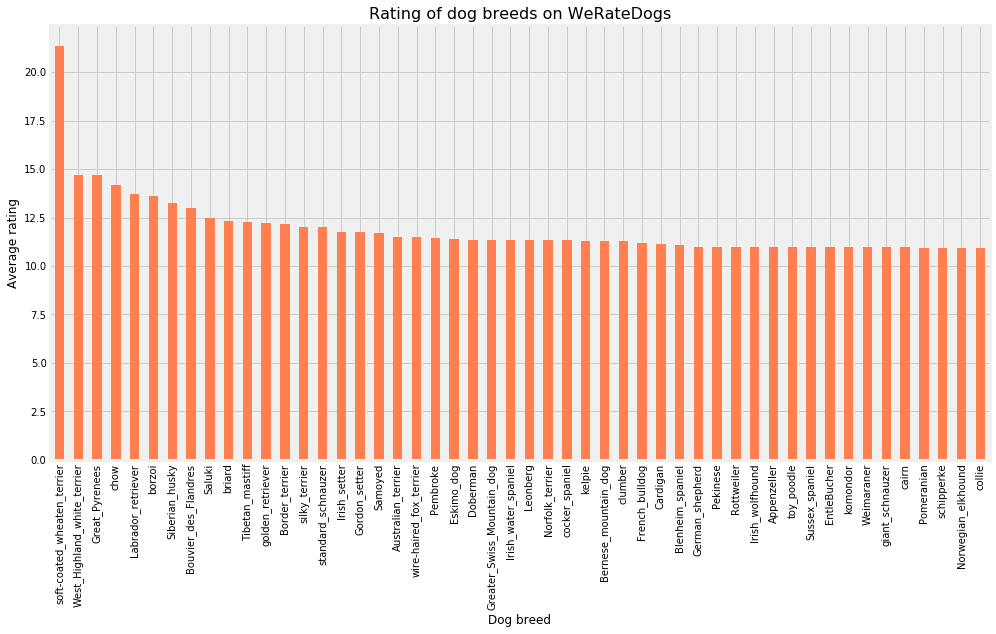

In [65]:
# Plot to show average ratings of top 50 dog breeds
fig = plt.figure(figsize=(15,8))
master_df.groupby('dog_breed')["rating_numerator"].mean().sort_values(
    ascending=False).nlargest(50).plot(kind='bar', color='coral')
plt.title("Rating of dog breeds on WeRateDogs",fontsize=16)
plt.ylabel("Average rating")
plt.xlabel("Dog breed");


### Tweet's retweet count and favorite ("like") count

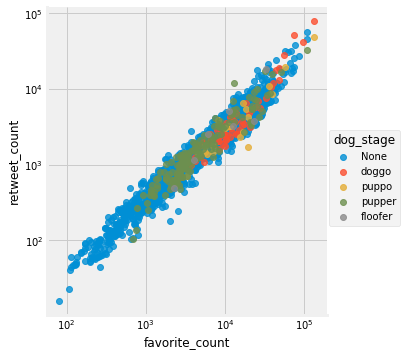

In [66]:
# log plot for tweets favorite count trend
sns.lmplot(x="favorite_count", y="retweet_count",data=master_df, 
           hue='dog_stage', fit_reg=False);
plt.xscale('log');
plt.yscale('log');

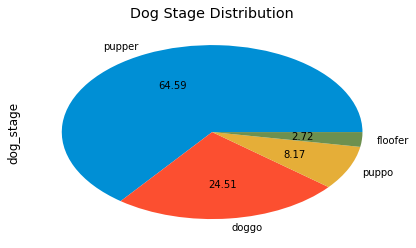

In [67]:
# plot to see distribution of dog stages
master_df[master_df.dog_stage!='None'].dog_stage.value_counts().plot.pie(
    title="Dog Stage Distribution", autopct='%.2f');

### Source for tweets

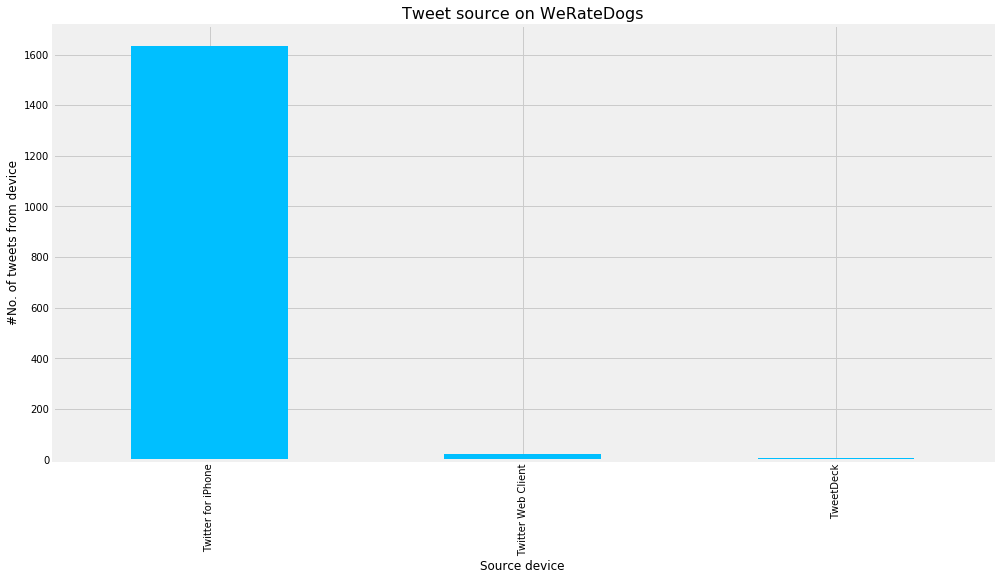

In [68]:
# Plot source for tweet users
fig = plt.figure(figsize=(15,8))
master_df.source.value_counts().plot(kind='bar', color='deepskyblue')
plt.title("Tweet source on WeRateDogs",fontsize=16)
plt.ylabel("#No. of tweets from device")
plt.xlabel("Source device");

### Visualization (using Tableau)

#### 1. Favorite count and Retweet count timeline

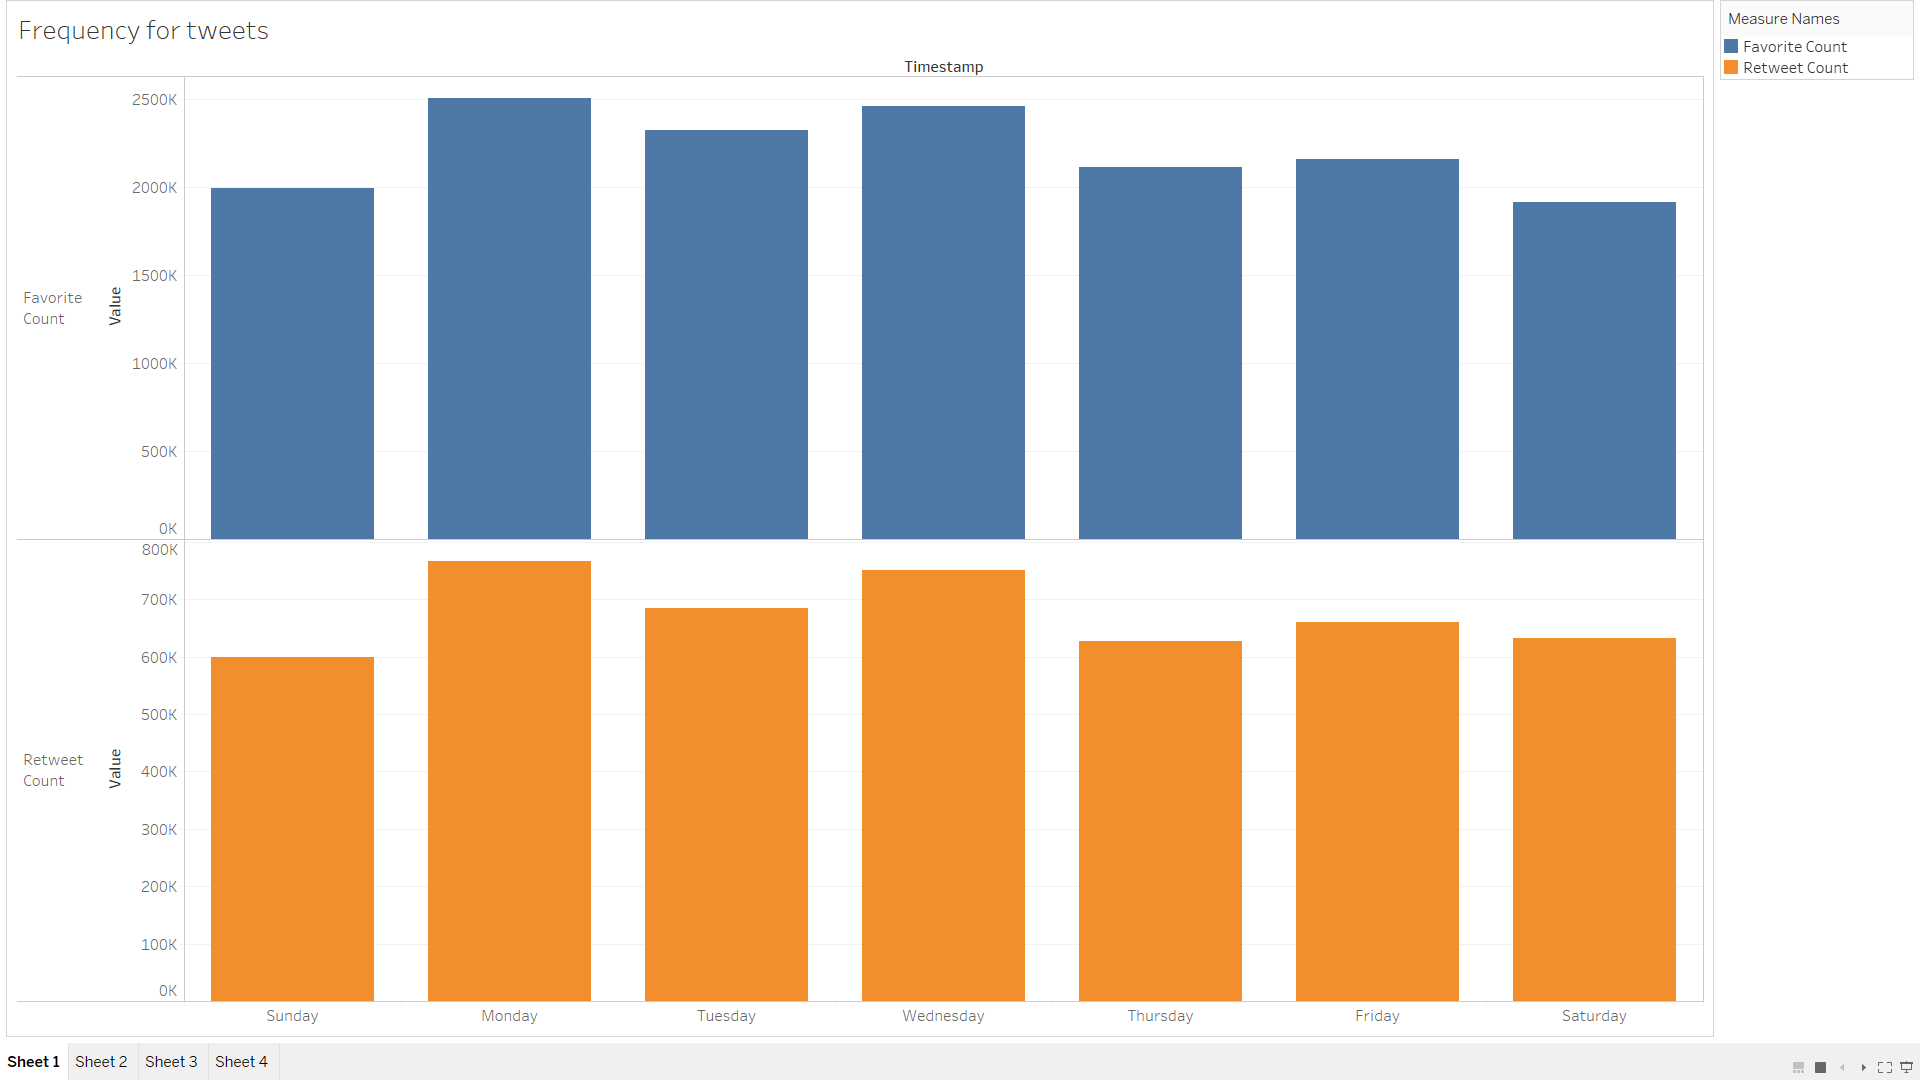

#### 2. Favorite dog names

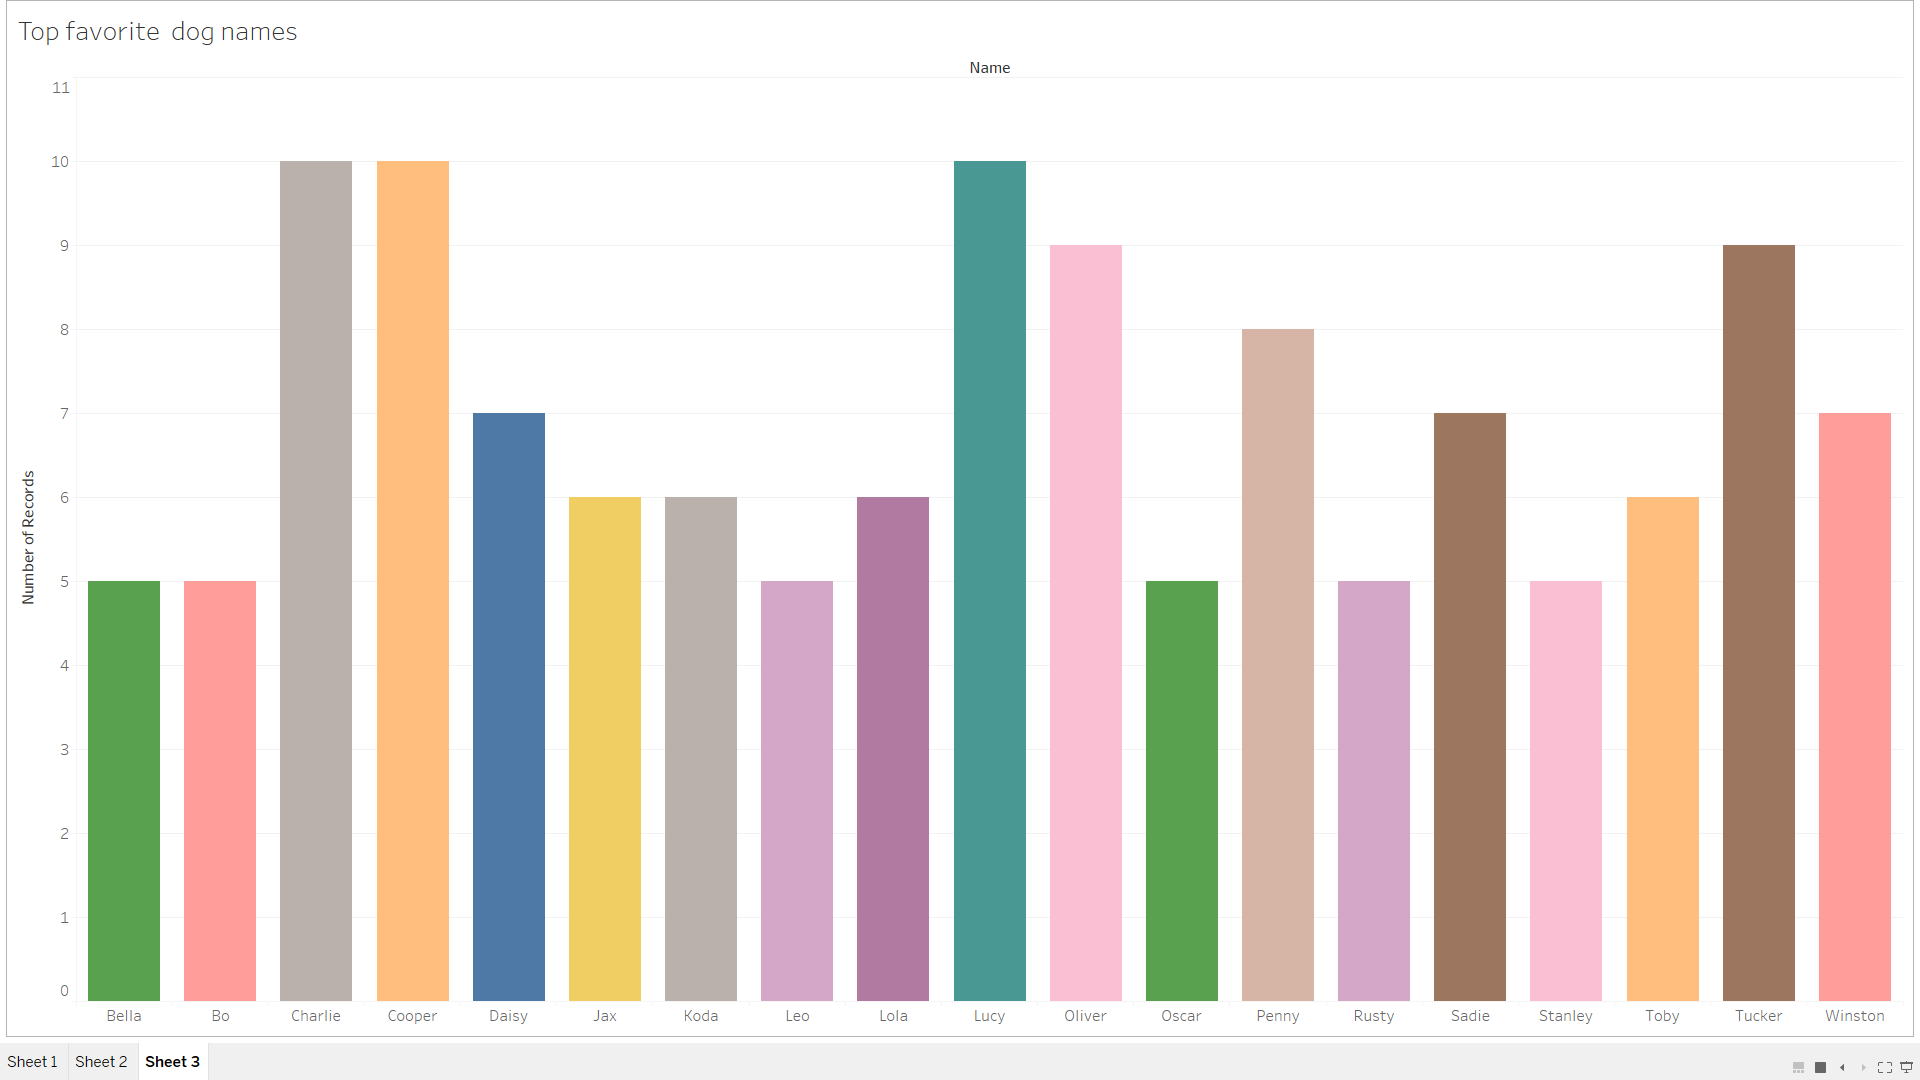

## Conclusion:

### Top insights after analysis

1. Most favorite dog breed which is tweeted on WeRateDogs are:
    - Golden retriever: 156
    - Labrador retriever: 106
    - Pembroke: 94
2. Most favorite count and retweet count comes on Monday. 
3. Most favorite dog stage mentioned in tweet is pupper.
4. Famous dog names were Charlie, Cooper, Lucy, Oliver, and Tucker.
5. Most of the tweets came form iPhone.